In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
covid_data = pd.read_csv('owid-covid-data.csv')

In [4]:
print(covid_data.columns)
print(covid_data.head())
print(covid_data.isnull().sum())

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [6]:
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']
filtered_data = covid_data[covid_data['location'].isin(countries)]

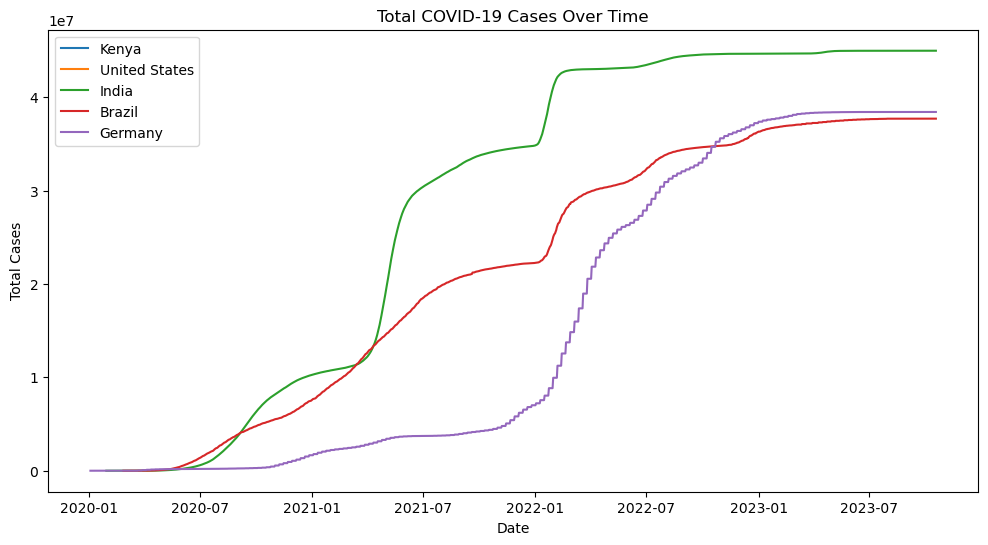

In [7]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

In [9]:
filtered_data['death_rate'] = filtered_data['total_deaths'] / filtered_data['total_cases']

/tmp/ipykernel_195/2948991006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['death_rate'] = filtered_data['total_deaths'] / filtered_data['total_cases']


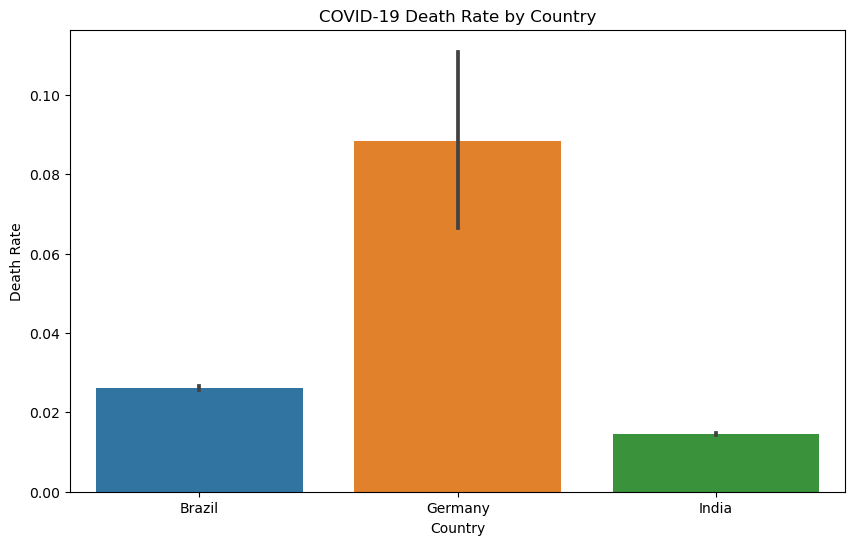

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_data, x='location', y='death_rate')
plt.title('COVID-19 Death Rate by Country')
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.show()

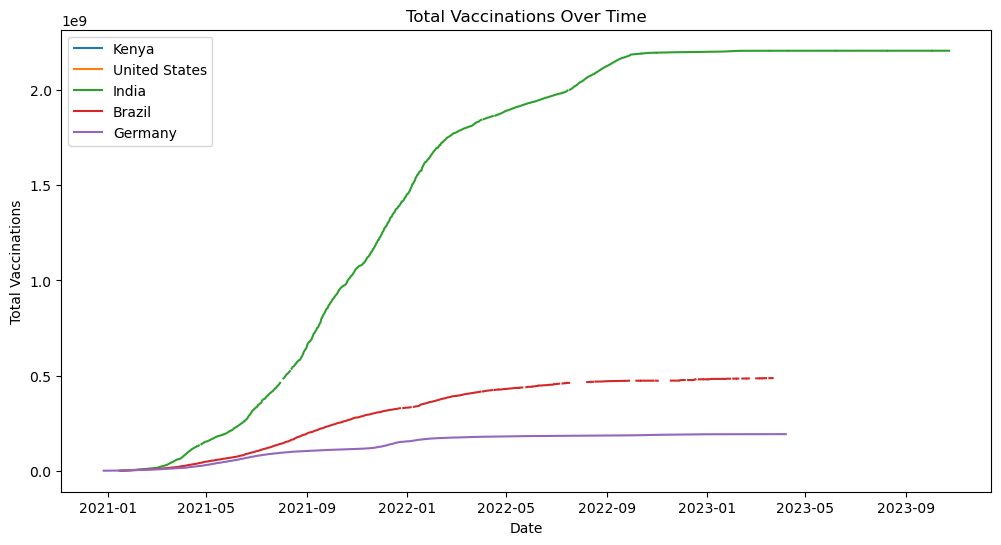

In [11]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()

In [12]:
import plotly.express as px

# Prepare latest data for each country
latest_data = covid_data.sort_values('date').groupby('location').last().reset_index()

# Create choropleth
fig = px.choropleth(latest_data, 
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total COVID-19 Cases per Million")